In [385]:
import pandas as pd

train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

In [386]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [387]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [388]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [389]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [390]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [391]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [392]:
train = train.dropna()
test = test.dropna()

In [316]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [317]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


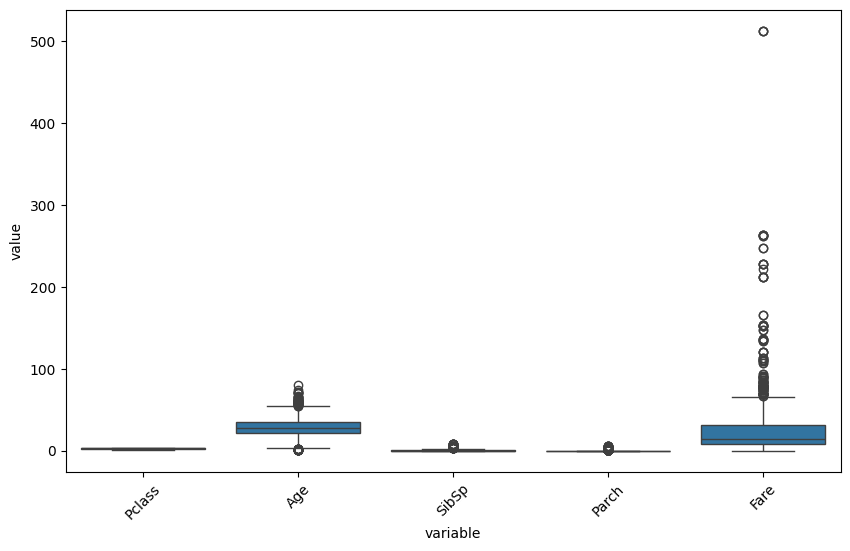

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상자 그림 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]))
plt.xticks(rotation=45)
plt.show()

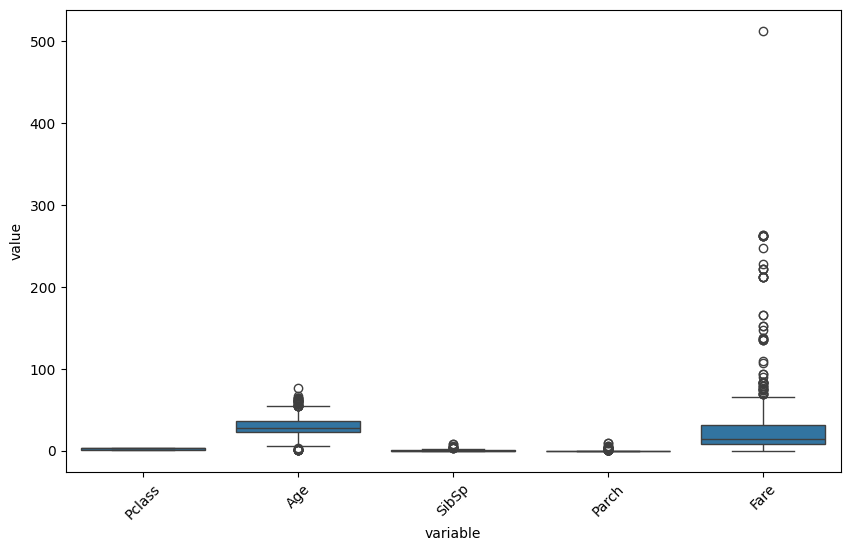

In [319]:
# 상자 그림 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]))
plt.xticks(rotation=45)
plt.show()

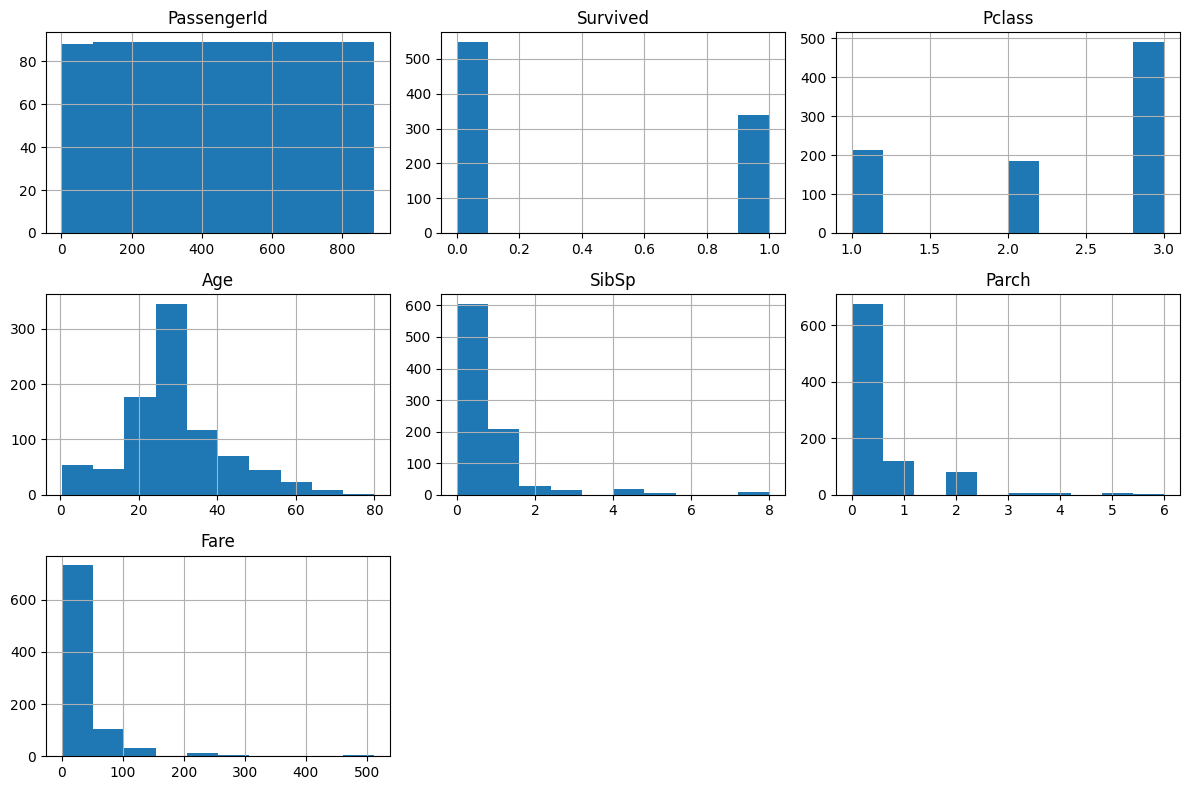

In [320]:
train.hist(figsize=(12,8))
plt.tight_layout()

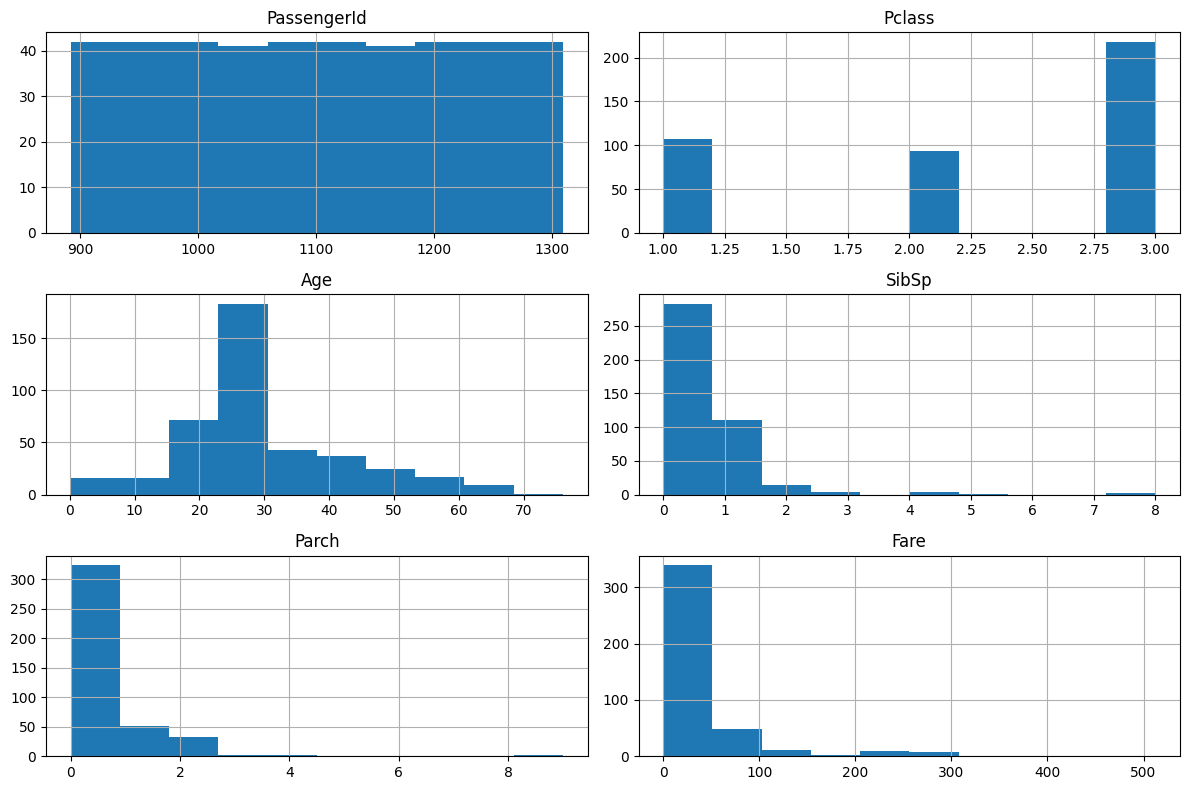

In [321]:
test.hist(figsize=(12,8))
plt.tight_layout()

In [322]:
import numpy as np

variables = ['Fare']

for variable in variables:
    # 변수의 중위수 계산
    median_value = train[variable].median()

    # 이상치를 정의하기 위한 상한치와 하한치 계산 (예: 중위수 ± 3 * IQR)
    IQR = train[variable].quantile(0.75) - train[variable].quantile(0.25)
    lower_bound = train[variable].quantile(0.25) - 3 * IQR
    upper_bound = train[variable].quantile(0.75) + 3 * IQR

    # 이상치를 중위수로 대체
    train[variable] = np.where((train[variable] < lower_bound) | (train[variable] > upper_bound), median_value, train[variable])


In [323]:
import numpy as np

variables = ['Fare']

for variable in variables:
    # 변수의 중위수 계산
    median_value = test[variable].median()

    # 이상치를 정의하기 위한 상한치와 하한치 계산 (예: 중위수 ± 3 * IQR)
    IQR = test[variable].quantile(0.75) - test[variable].quantile(0.25)
    lower_bound = test[variable].quantile(0.25) - 3 * IQR
    upper_bound = test[variable].quantile(0.75) + 3 * IQR

    # 이상치를 중위수로 대체
    test[variable] = np.where((test[variable] < lower_bound) | (test[variable] > upper_bound), median_value, test[variable])

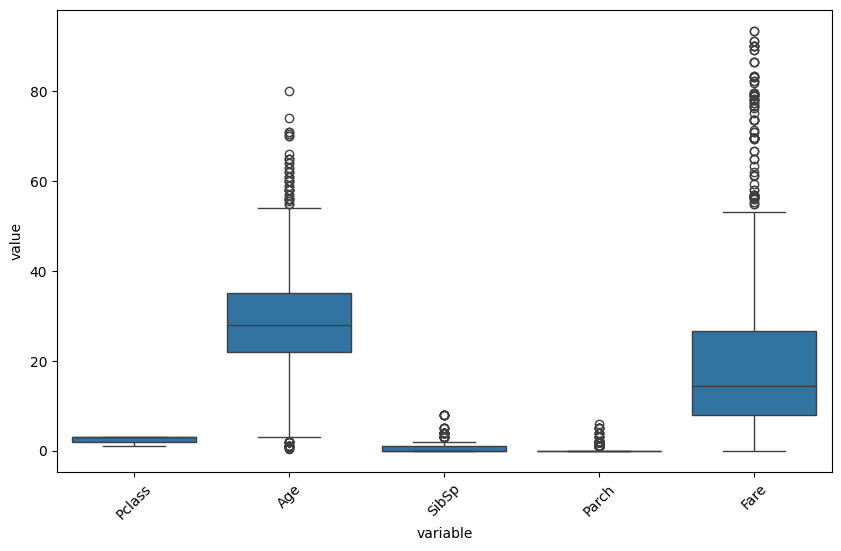

In [324]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]))
plt.xticks(rotation=45)
plt.show()

In [393]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in ['Sex', 'Embarked']:
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.fit_transform(test[column])

In [394]:
target = train.pop('Survived')
train = train.drop('PassengerId', axis=1)
target_index = test.pop('PassengerId')

In [395]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

In [396]:
train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

In [397]:
cols = ["Pclass", "Sex", "SibSp", "Parch"]

train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']

In [398]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [329]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
train_scaler = ss.fit_transform(train)
test_scaler = ss.transform(test)

In [399]:
from sklearn.model_selection import train_test_split
X_tr, X_val, Y_tr, Y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_tr.shape, X_val.shape, Y_tr.shape, Y_val.shape

((711, 8), (178, 8), (711,), (178,))

In [400]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [401]:
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict(xtest)
    C = f1_score(ytest, ypred)
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

In [402]:
# [19] 다양한 모델을 만들고 성능을 출력하는 함수 작성
def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression().fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    # overfitting
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(5, 10):
        model3 = DecisionTreeClassifier(max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(5, 10):
        model4 = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    for d in range(5, 10):
        model5 = GradientBoostingClassifier(n_estimators=500, max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model5', d, get_scores(model5, xtrain, xtest, ytrain, ytest))

    for d in range(5, 10):
        model6 = XGBClassifier(n_estimators=500, max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model6', d, get_scores(model5, xtrain, xtest, ytrain, ytest))


In [403]:
make_models(X_tr, X_val, Y_tr, Y_val)

model1 0.7932 0.8090 0.7424
model3 0.9817 0.7584 0.6861
model3 5 0.8565 0.7809 0.6422
model3 6 0.8706 0.7753 0.6364
model3 7 0.8861 0.7697 0.6306
model3 8 0.9044 0.7697 0.6667
model3 9 0.9241 0.7584 0.6126
model4 0.9817 0.8258 0.7634
model4 5 0.8509 0.8202 0.7333
model4 6 0.8664 0.8258 0.7395
model4 7 0.8945 0.8090 0.7302
model4 8 0.9142 0.8371 0.7752
model4 9 0.9297 0.8146 0.7442
model5 5 0.9817 0.8146 0.7442
model5 6 0.9817 0.8315 0.7656
model5 7 0.9817 0.8202 0.7460
model5 8 0.9817 0.8202 0.7500
model5 9 0.9817 0.8371 0.7680
model6 5 0.9817 0.8371 0.7680
model6 6 0.9817 0.8371 0.7680
model6 7 0.9817 0.8371 0.7680
model6 8 0.9817 0.8371 0.7680
model6 9 0.9817 0.8371 0.7680


In [381]:
from xgboost import XGBClassifier

In [452]:
model = XGBClassifier(n_estimators=400, learning_rate=0.2, max_depth=5, random_state = 2024).fit(X_tr, Y_tr)

In [428]:
model5 = RandomForestClassifier(n_estimators=400, max_depth=6, random_state=0).fit(X_tr, Y_tr)

In [453]:
pred1 = model.predict(X_val)

from sklearn.metrics import accuracy_score

AB = accuracy_score(Y_val, pred1)
print(AB)

0.8539325842696629


In [356]:
from sklearn.model_selection import cross_val_score

# 교차 검증
scores = cross_val_score(model5, X_tr, Y_tr, cv=5)
print("교차 검증 점수:", scores)
print("평균 점수:", scores.mean())

교차 검증 점수: [0.83216783 0.76760563 0.74647887 0.85915493 0.8028169 ]
평균 점수: 0.8016448340392003


In [454]:
pred = model.predict(test)
#pd.DataFrame({'pred':pred})

In [417]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [455]:
result = {
    'PassengerId' : target_index,
    'Survived' : pred,
}
output = pd.DataFrame(result)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [456]:
output.to_csv('data/result_09.csv', index=False)